In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 

import utils
from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from scipy.spatial import distance


In [2]:
subj = utils.ExpInfo.getSubjIDs()[1]
task = utils.ExpInfo.taskName[1]


In [3]:
xhy = utils.LoadData.xhy(subj, task)
xhy_disp = utils.LoadData.xhy_disp(subj, task)
d = utils.LoadData.mouseMovement_array(subj, task, velocity=True)
df_beh = utils.LoadData.behaviorData(subj, task) 

Text(0.5, 1.0, 'average cosine_similarity')

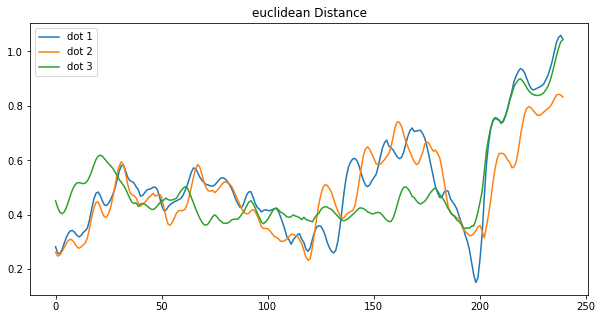

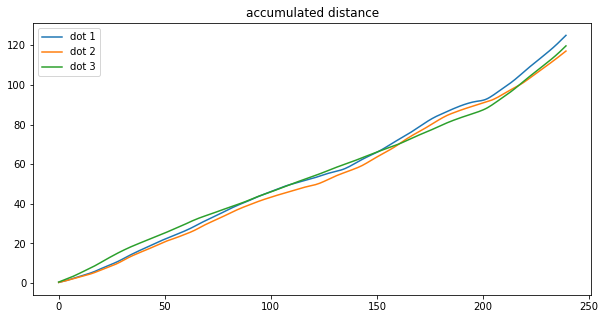

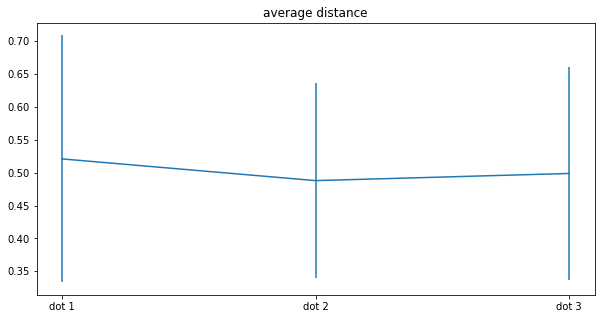

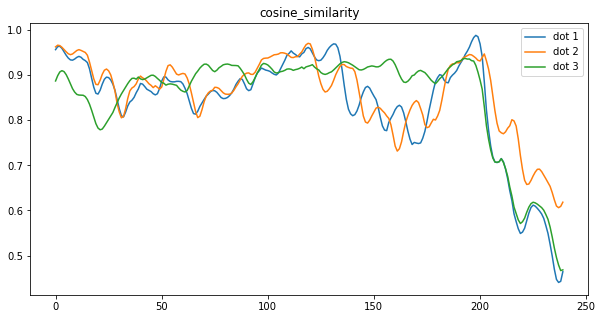

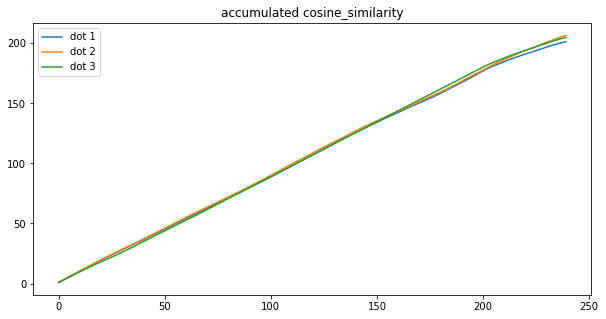

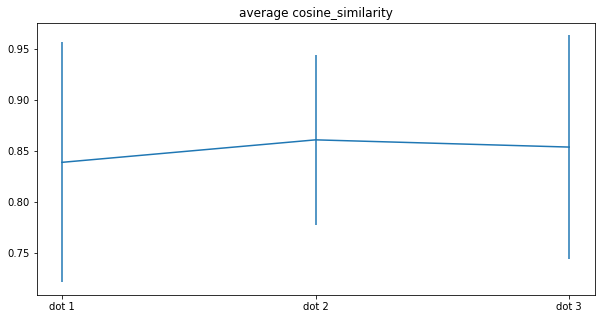

In [62]:
iTrial = 46
dist_measure = 'euclidean'
# dist_measure = 'cosine'

dist_cos = []
dist = []
for iDot in range(3):
    h1 = xhy[1][iTrial][:-1, :]
    h2 = xhy_disp[1][iTrial][iDot]
    dist_cos_ = cosine_similarity(h1, h2).diagonal()
    dist_ = paired_distances(h1, h2, metric=dist_measure)
    dist_cos.append(dist_cos_)
    dist.append(dist_)
    
dist = np.vstack(dist).T
dist_cos = np.vstack(dist_cos).T

# ----------------------------------- plot ---------------------------------- #
    
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title(f'{dist_measure} Distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist.mean(axis=0), yerr=dist.std(axis=0))
ax.set_title('average distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist_cos.mean(axis=0), yerr=dist_cos.std(axis=0))
ax.set_title('average cosine_similarity')


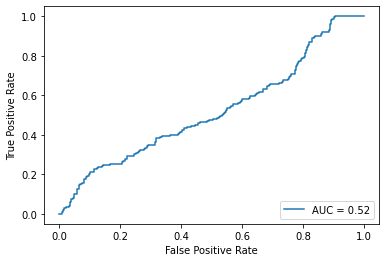

In [63]:
from sklearn import metrics 

y_true = np.zeros(dist.shape)
y_true[:, 1] = 1
fpr, tpr, thresholds = metrics.roc_curve(y_true.flatten(), 1-dist.flatten())
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [28]:
dist

array([[0.95456883, 0.25577654, 0.69693388],
       [0.97207245, 0.23471205, 0.68875012],
       [0.9655927 , 0.226326  , 0.67709842],
       [0.93786278, 0.21422213, 0.6710268 ],
       [0.92442817, 0.21826183, 0.66709933],
       [0.88415031, 0.21077728, 0.66166687],
       [0.83701182, 0.21416608, 0.65575831],
       [0.79141765, 0.21967555, 0.64648631],
       [0.74898789, 0.22308498, 0.6340108 ],
       [0.71605458, 0.21737261, 0.62183816],
       [0.69107506, 0.22336123, 0.61492024],
       [0.68027314, 0.22380097, 0.62555384],
       [0.68329336, 0.21922415, 0.66136663],
       [0.69462327, 0.21608094, 0.73068043],
       [0.70737104, 0.20829391, 0.82392796],
       [0.73330138, 0.22846247, 0.93535829],
       [0.80256714, 0.19257211, 1.05958269],
       [0.85336095, 0.18573644, 1.13887011],
       [0.90711522, 0.18343194, 1.1957517 ],
       [0.9649072 , 0.18349055, 1.2283068 ],
       [0.99809634, 0.18363638, 1.22586802],
       [1.02933218, 0.18408076, 1.19147702],
       [1.

In [61]:
# Sensory level

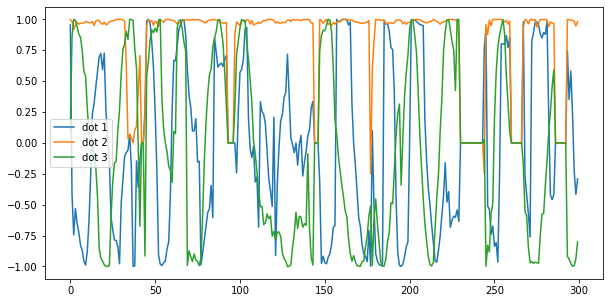

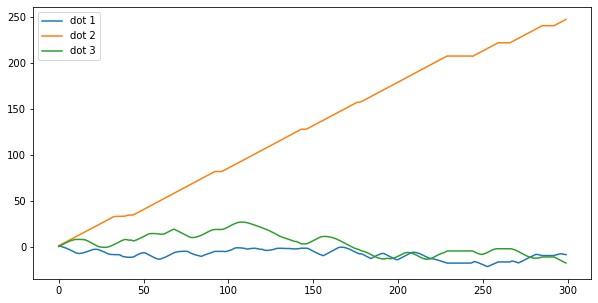

In [14]:
d1 = d[0][iTrial]
dist = []
for i in range(3):
    d2 = d[1][iTrial][:, i*2:i*2+2]
    dist_ = cosine_similarity(d1, d2).diagonal()
    # dist_ = paired_distances(d1, d2, metric=dist_measure)
    dist.append(dist_)
dist = np.vstack(dist).T

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
